# Generate patterns in time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.patterns import add_linear_trend, add_offset, scale, Pattern, RandomlySpacedPatterns, RandomlySpacedLinearPatterns, RandomlySpacedConstantPatterns
import matplotlib.patches as patches

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Import data (using sktime)

In [3]:
from sktime.datasets import load_airline

In [4]:
X = load_airline()
t = X.index.to_timestamp()

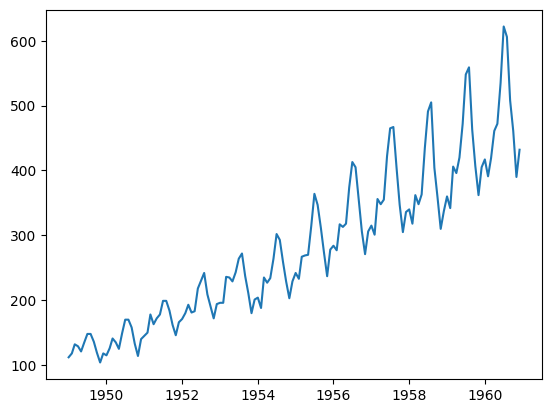

In [5]:
plt.plot(t, X.values)

## Defining and injecting patterns manually

### Defining a pattern

In [6]:
p = Pattern(values=np.array([0,0.2,0.1,0.3,0.2,0.4,-0.4,-0.2,-0.3,-0.1,-0.2,-0.0]))

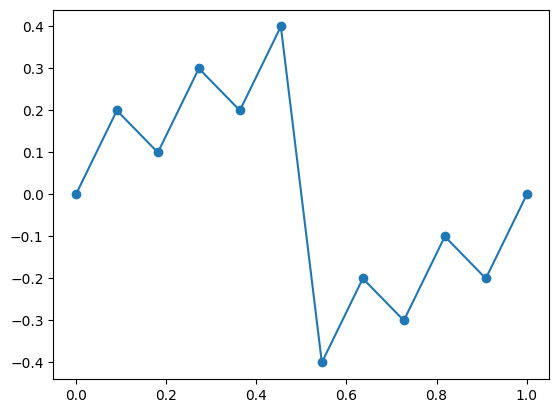

In [7]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

### Resampling a pattern

The Pattern class provides a method for resampling a pattern. It is based on Cubic Spline Interpolation


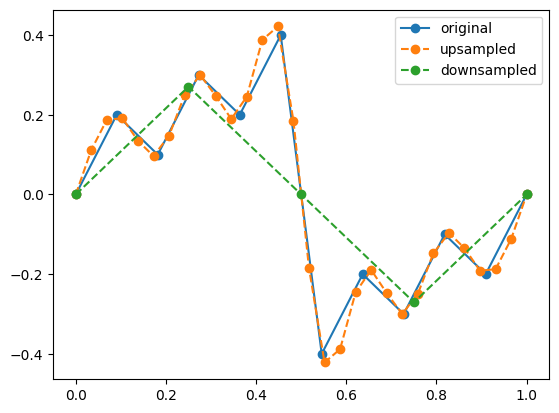

In [8]:
upsampled_pattern = p.resample(nb_point=30)
downsampled_pattern = p.resample(nb_point=5)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')
ax.plot(np.linspace(0,1,len(upsampled_pattern)), upsampled_pattern, 'o', ls='--', color='C1', label='upsampled')
ax.plot(np.linspace(0,1,len(downsampled_pattern)), downsampled_pattern, 'o', ls='--', color='C2', label='downsampled')
plt.legend()

### Add a linear trend to the pattern

The function `add_linear_trend` takes three arguments: the values to be transformed, a start_value (were the new pattern should start) and end_value (where the new pattern should end)

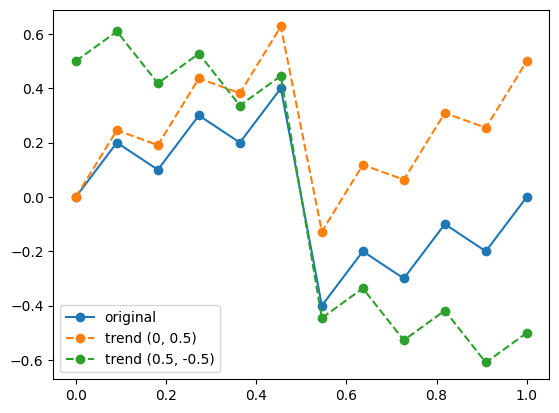

In [9]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, (start, end) in enumerate([(0,0.5),(0.5,-0.5)]):
    ax.plot(np.linspace(0,1,len(p.values)), add_linear_trend(p.values, start_value=start, end_value=end), 'o', ls='--', color=f'C{i+1}', label=f'trend ({start}, {end})')

plt.legend()

### Add an offset (bias) to the pattern

The function `add_offset` takes two arguments: the values to be transformed and an offset (float or int)

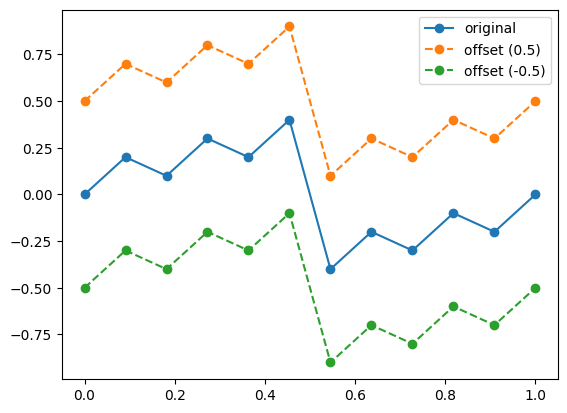

In [10]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, offset in enumerate([0.5,-0.5]):
    ax.plot(np.linspace(0,1,len(p.values)), add_offset(p.values, offset), 'o', ls='--', color=f'C{i+1}', label=f'offset ({offset})')

plt.legend()

### Scale a pattern

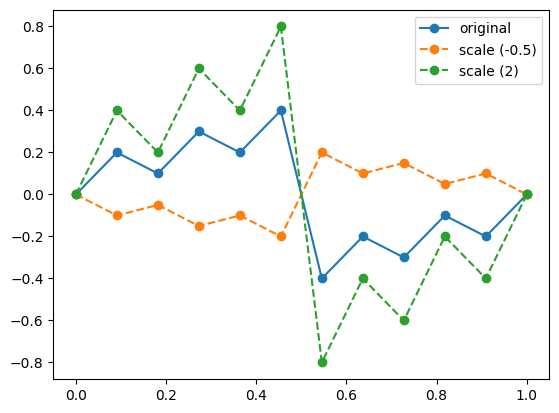

In [11]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, scaling_factor in enumerate([-0.5,2]):
    ax.plot(np.linspace(0,1,len(p.values)), scale(p.values, scaling_factor), 'o', ls='--', color=f'C{i+1}', label=f'scale ({scaling_factor})')

plt.legend()

### Combining different operations to inject a pattern in an existing time series



In [14]:
# start and end coordinate where the pattern should be injected

start = 100
end = 120

# start and end values
v_start = X[start]
v_end = X[end]

# number of points needed for resampling
nb_points = end - start + 1

# compute a scaling factor to make the pattern looks realistic
scaling_factor = (np.max(X[start:end+1]) - np.min(X[start:end+1])) / (np.max(p.values) - np.min(p.values)) * rng.normal(1,0.2)

# print out the scaling factor
print(f'Scaling factor = {scaling_factor}')

transformed_pattern = p.resample(nb_point=nb_points)
transformed_pattern = scale(transformed_pattern, scaling_factor=scaling_factor)
transformed_pattern = add_linear_trend(start_value=v_start, end_value=v_end, values=transformed_pattern)

Xt = X.copy()
Xt[start:end+1] = transformed_pattern

Scaling factor = 243.39475683543492


ValueError: could not broadcast input array from shape (21,1) into shape (21,)

In [ ]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
width = t[end]-t[start]
left = t[start]
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor="red", alpha=0.1)
axes[1].add_patch(rect)

plt.tight_layout();

## Using predefined recipes (already available generators)

### Randomly generate patterns (subsequences) with constant values

In [15]:
generator = RandomlySpacedConstantPatterns(n_patterns=5, min_width_pattern=5, max_width_patterns=15, constant_value=0, random_generator=rng)

In [16]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

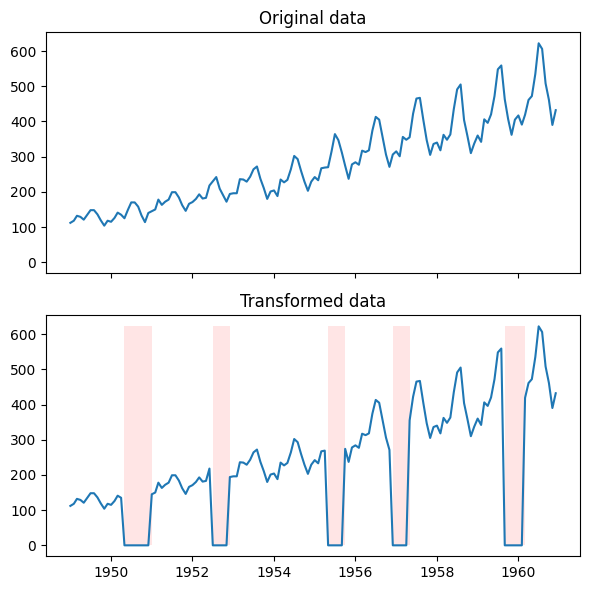

In [17]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for start, end in generator.patterns_indices_:
    width = t[end]-t[start]
    left = t[start]
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
plt.tight_layout();

### Generate patterns with constant slope (linear)

In [18]:
generator = RandomlySpacedLinearPatterns(n_patterns=5, min_width_pattern=5, max_width_patterns=15, random_generator=rng)

In [19]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

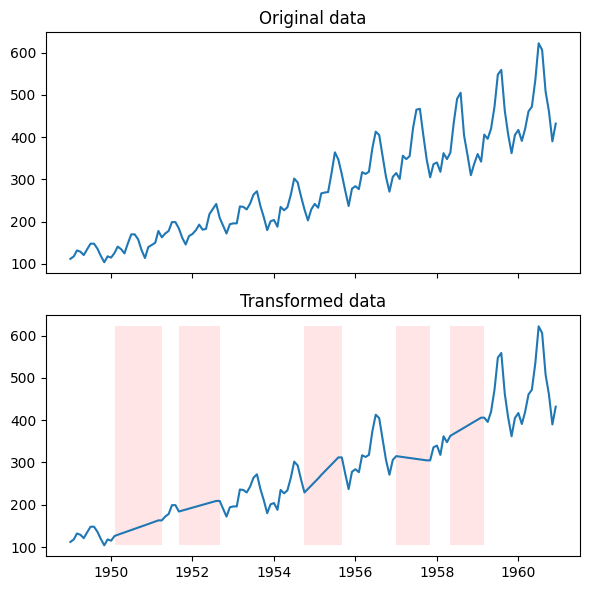

In [20]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for start, end in generator.patterns_indices_:
    width = t[end]-t[start]
    left = t[start]
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
plt.tight_layout();

### Inject predefined patterns

In [21]:
p = Pattern(values=np.array([0,0.2,0.1,0.3,0.2,0.4,-0.4,-0.2,-0.3,-0.1,-0.2,-0.0]))
generator = RandomlySpacedPatterns(n_patterns=5, min_width_pattern=5, max_width_patterns=15, pattern=p ,random_generator=rng)

In [22]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

ValueError: could not broadcast input array from shape (13,1) into shape (9,1)

In [ ]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for start, end in generator.patterns_indices_:
    width = t[end]-t[start]
    left = t[start]
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
plt.tight_layout();

In [ ]:
from badgers.generators.time_series.patterns import Pattern, add_linear_trend, add_offset, scale

### Defining a pattern

p = Pattern(values=np.array([0,0.25,0.75,1,0.75,0.25,-0.5,-0.75,-0.5,-0.25,-0.1,0]))

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

### Resampling a pattern

The Pattern class provides a method for resampling a pattern. It is based on Cubic Spline Interpolation


In [ ]:
upsampled_pattern = p.resample(nb_point=20)
downsampled_pattern = p.resample(nb_point=5)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')
ax.plot(np.linspace(0,1,len(upsampled_pattern)), upsampled_pattern, 'o', ls='-', color='C1', label='upsampled')
ax.plot(np.linspace(0,1,len(downsampled_pattern)), downsampled_pattern, 'o', ls='-', color='C2', label='downsampled')
plt.legend()

### Add a linear trend to the pattern

The function `add_linear_trend` takes three arguments: the values to be transformed, a start_value (were the new pattern should start) and end_value (where the new pattern should end)

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, (start, end) in enumerate([(0,0.5),(0.5,-0.5)]):
    ax.plot(np.linspace(0,1,len(p.values)), add_linear_trend(p.values, start_value=start, end_value=end), 'o', ls='--', color=f'C{i+1}', label=f'trend ({start}, {end})')

plt.legend()

### Add an offset (bias) to the pattern

THe function `add_offset` takes two arguments: the values to be transformed and an offset (float or int)

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, offset in enumerate([0.5,-0.5]):
    ax.plot(np.linspace(0,1,len(p.values)), add_offset(p.values, offset), 'o', ls='--', color=f'C{i+1}', label=f'offset ({offset})')

plt.legend()

### Scale a pattern

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, scaling_factor in enumerate([-0.5,2]):
    ax.plot(np.linspace(0,1,len(p.values)), scale(p.values, scaling_factor), 'o', ls='--', color=f'C{i+1}', label=f'scale ({scaling_factor})')

plt.legend()

### Combining different operations

In [ ]:
# first resample the pattern (as of version 0.0.6, this might change in the future)

transformed_pattern = add_offset(
    scale(
        p.resample(nb_point=20), 
        scaling_factor=2
    ),
    offset=-5
)


fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')
ax.plot(np.linspace(0,1,len(transformed_pattern)), transformed_pattern, 'o', ls='--', color='C1', label='transformed')